# PART III - Machine Learning
#####  @ Haim Goldfisher

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #(divide into train/test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics #(vital for notebook)
from sklearn.metrics import mean_squared_error, confusion_matrix


# DATASET Num 2 : REGRESSION

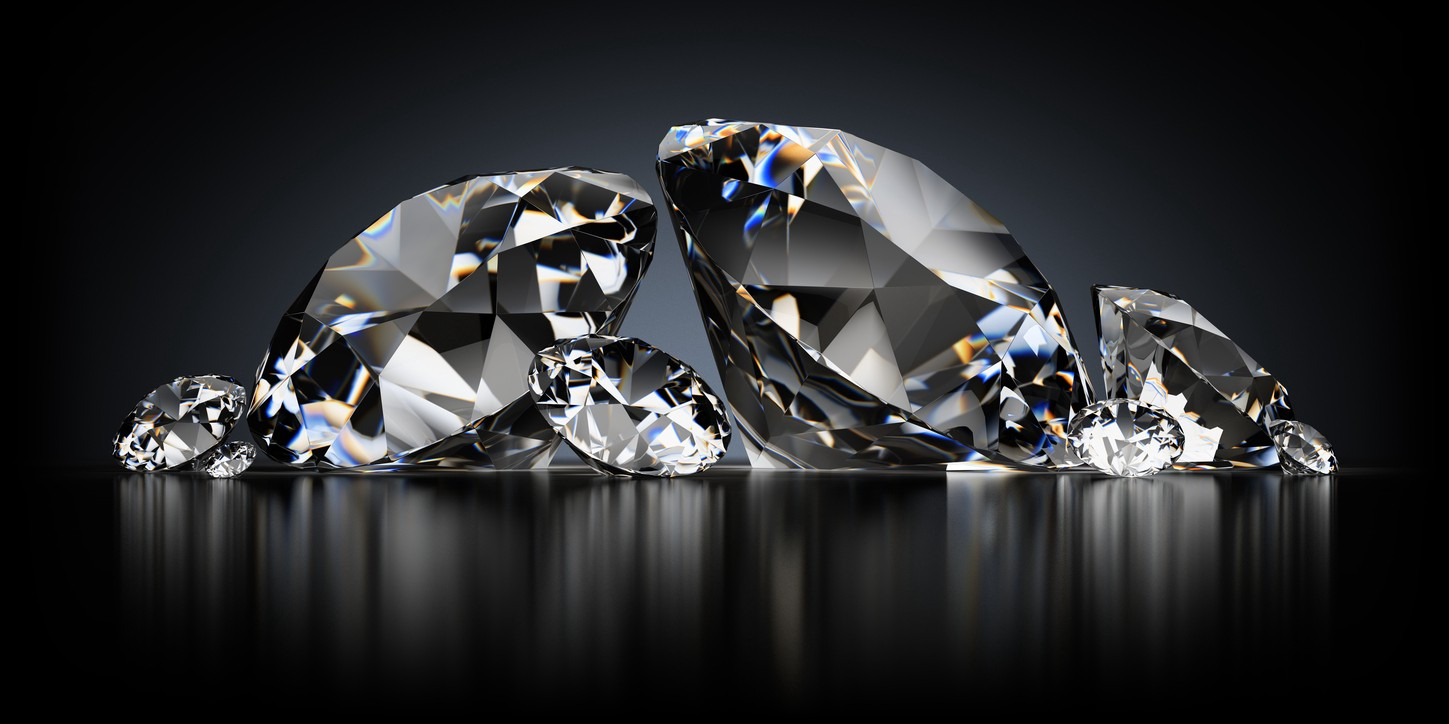

### Quick review:
##### Link to the dataset: https://www.kaggle.com/shivam2503/diamonds
This classic dataset contains the prices and other attributes of almost 54,000 diamonds.
I would like to create a model which will predict the price of a diamond, according to it's data.
The things that we going to find out:
- What is the biggest factor on diamond's price?
- Do people are likely to pay a high price on a diamond because of it's look, size or it's quality?

Firstly, we will upload the dataset:

In [147]:
diamonds = pd.read_csv('C:\Haim\Anaconda\diamonds.csv')

diamonds # display the first and last 5 rows

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

There are 10 attributes included in the dataset including the target ie. price.

###### Feature description:

- **Price:** price in US dollars ($\$$326 - $\$$18,823) This is the target column containing tags for the features. 

###### The 4 Cs of Diamonds:

- **Carat:** (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

- **Cut:** (Fair$\rightarrow$Good$\rightarrow$Very Good$\rightarrow$Premium$\rightarrow$Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

- **Color:** from J (worst) to D (best). The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

- **Clarity:** (I1 (worst)$\rightarrow$SI2$\rightarrow$SI1$\rightarrow$VS2$\rightarrow$VS1$\rightarrow$VVS2$\rightarrow$VVS1$\rightarrow$IF (best)). Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

###### Dimensions:

- **Depth:** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter.

- **Table:** The width of the diamond's table expressed as a percentage of its average diameter.

- **X:** Length in mm (0-10.74).

- **Y:** Width in mm (0-58.9).

- **Z:** Depth in mm (0-31.8).

###### What else do we know?
- Because the response variable is continuous, this is a **regression** problem. 

In [148]:
diamonds.shape

(53940, 11)

In [65]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


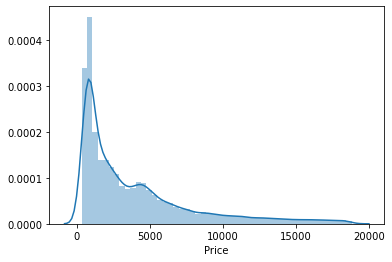

In [5]:
sns.distplot(diamonds['price'], axlabel="Price",  kde=True) # The following graph shows the price distribution of the diamonds

In [6]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## Data Preprocessing


In [109]:
diamonds.isnull().sum() # if we have null values, we would like to drop them

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [110]:
diamonds.duplicated().sum() # if we have duplicates values, we would like to drop them

0

As you can see, the dataset has no null data, it also has no duplicated rows.

In [111]:
diamonds.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

Let's take a look at the x,y,z columns. In the min's row, we have some illegal values. Those diamonds are dimensionless, or lost one of the dimensions. We must filter out those as it clearly faulty data points

In [149]:
#Dropping dimentionless diamonds
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds.shape

(53920, 11)

We had at the start 53,940 diamonds, now we have 53,920. It means that we "lost" only 20 diamonds.

I decided to remove some unnecessary columns.
It seems that the first column present the index of the row. We will drop it:

In [150]:
diamonds.drop('Unnamed: 0', axis = 1, inplace = True) # its just index

diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

As we saw, cut, color aand clarity are ordinal data. We would like to make them numerical so 1 will present the worst and the biggest number will present the best.
Firstly, we would like to understand what do those columns icluded.

In [114]:
diamonds['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

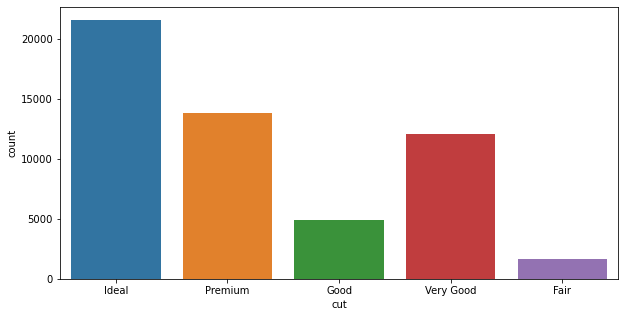

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(x = diamonds['cut']); # we will plot it for better illustration

According to the explantionfor, the order is: Fair, Good, Very Good, Premium, Ideal.

So that, we would like to set the order:

1 - Fair

2 - Good

3 - Very Good

4 - Premium

5 - Ideal

In [14]:
diamonds['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

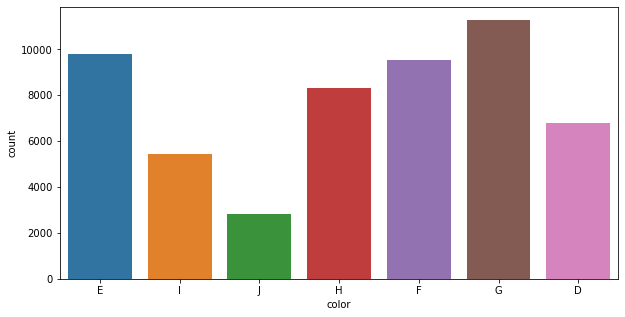

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = diamonds['color']); # we will plot it for better illustration

According to the explantionfor, D is the best and J is the worst.

So that, we would like to set the order:

1 - J

2 - I

3 - H

4 - G

5 - F

6 - E

7 - D

In [15]:
diamonds['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

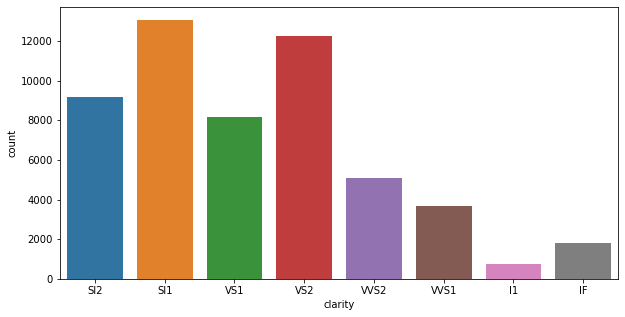

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x = diamonds['clarity']); # we will plot it for better illustration

According to the explantionfor, the order from best to worst: FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

So that, we would like to set the order:

1 - I3 (level 3 inclusions)

2 - I2

3 - I1

4 - SI2

5 - SI1

6 - VS2

7 - VS1

8 - VVS2

9 - VVS1

10 - IF

11 - FL (flawless)

In [151]:
#prepertion - categorical variables

diamonds['cut'] = diamonds['cut'].map({
    'Ideal'        :5,
    'Premium'      :4,
    'Very Good'    :3,
    'Good'         :2,
    'Fair'         :1
})

diamonds['color'] = diamonds['color'].map({
    'D'            :7,
    'E'            :6,
    'F'            :5,
    'G'            :4,
    'H'            :3,
    'I'            :2,
    'J'            :1
})
diamonds['clarity'] = diamonds['clarity'].map({
    'FL'            :11,
    'IF'            :10,
    'VVS1'          :9,
    'VVS2'          :8,
    'VS1'           :7,
    'VS2'           :6,
    'SI1'           :5,
    'SI2'           :4,
    'I1'            :3,
    'I2'            :2,
    'I13'           :1
})

diamonds

carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    5      6        4   61.5   55.0    326  3.95  3.98  2.43
1       0.21    4      6        5   59.8   61.0    326  3.89  3.84  2.31
2       0.23    2      6        7   56.9   65.0    327  4.05  4.07  2.31
3       0.29    4      2        6   62.4   58.0    334  4.20  4.23  2.63
4       0.31    2      1        4   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    5      7        5   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    2      7        5   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    3      7        5   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    4      3        4   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    5      7        4   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

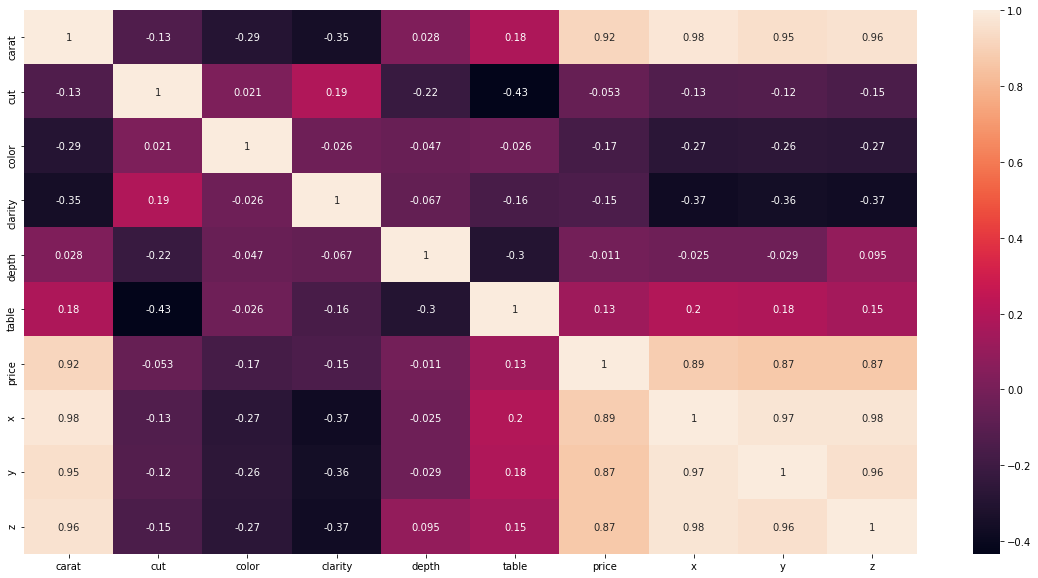

In [108]:
# I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(diamonds.corr(), annot=True);

The heatmap tells us the biggest story. We can infer that:
- The carat is the biggest factor to determine the price of a diamond. It obviously that X,Y and Z have a direct impact on the carat weight. The other features have a small value compare to it. It makes me think what would happen if we didn't have the size of the diamond. However, we can understand that the size means a lot when it comes to diamonds.
- If the carat has direct impact from the x,y,z values, maybe those columns are useless for the model. Because all those columns tell the same story. Moreover, maybe that fact can make our model unstable (to much weight to the size).
- "depth", "cut" and "table" show low correlation. We could consider dropping it.
- Diamonds are symetric. That fact has no connection to our model, but we can see that there is a huge correlation between x,y and z.


Let's have a look at regression plots to get a close look at the data:

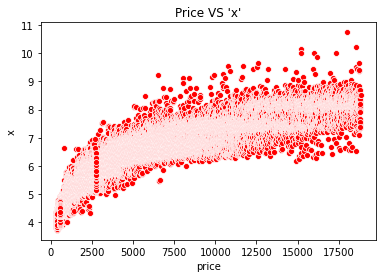

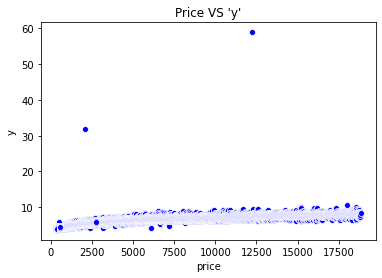

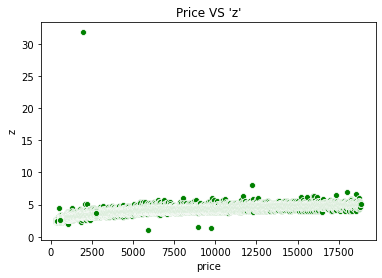

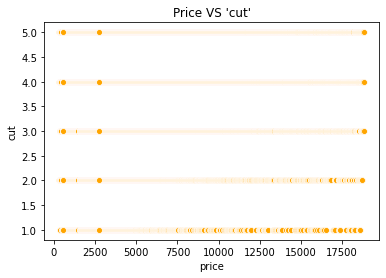

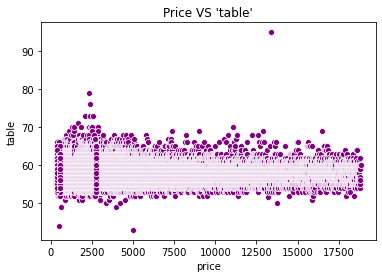

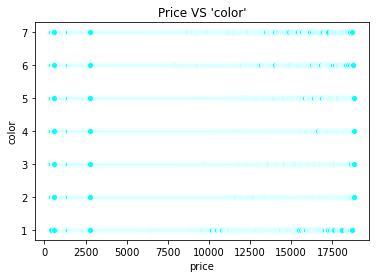

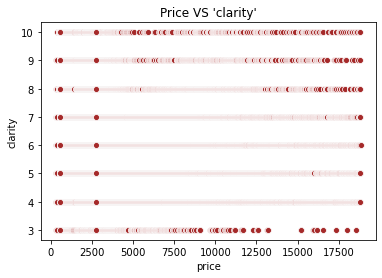

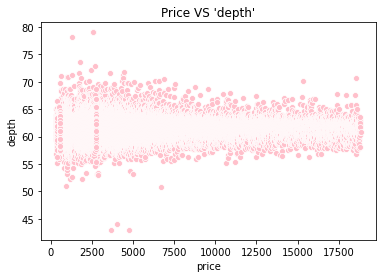

In [109]:

sns.scatterplot(x=diamonds.price, y=diamonds.x, color='red')
plt.title("Price VS 'x'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.y, color='blue')
plt.title("Price VS 'y'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.z, color='green')
plt.title("Price VS 'z'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.cut, color='orange')
plt.title("Price VS 'cut'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.table, color='purple')
plt.title("Price VS 'table'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.color, color='cyan')
plt.title("Price VS 'color'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.clarity, color='brown')
plt.title("Price VS 'clarity'")
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.depth, color='pink')
plt.title("Price VS 'depth'")
plt.show()

It can be seen that there is a gap between values that have correlation and those that do not. Moreover, points in the graph that are abnormal are noticeable. We would like to examine this. I chose to explore the features which are NOT ordinal. Because outliers cannot be found in ordinal categories.


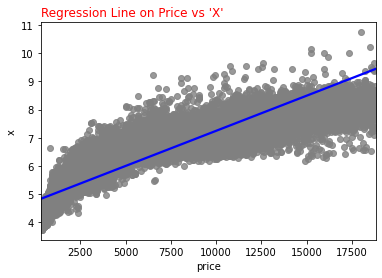

In [110]:
ax = sns.regplot(x="price", y="x", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'X'", color="red", loc='left');
# it looks ok to me

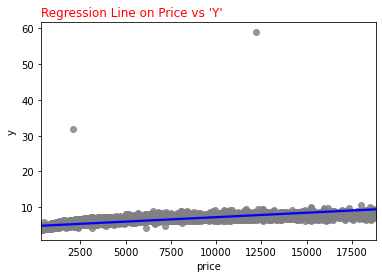

In [111]:
ax = sns.regplot(x="price", y="y", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'Y'", color="red", loc='left');
# the outliers are unusually prominent (n<30)

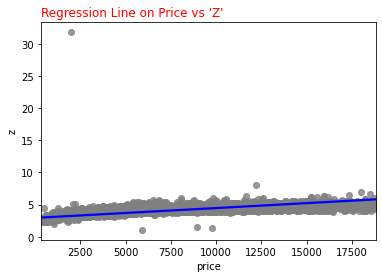

In [112]:
ax= sns.regplot(x="price", y="z", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'Z'", color="red", loc='left');
# the outliers are unusually prominent (2<n<30)

Text(0.0, 1.0, 'Regression Line on Price vs Carat')

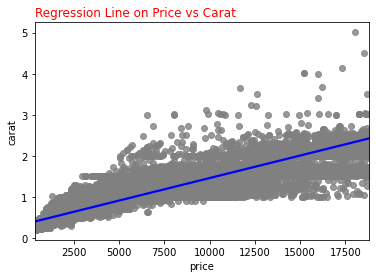

In [24]:
ax= sns.regplot(x="price", y="carat", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Carat", color="red", loc='left');
# it looks ok to me

Text(0.5, 1.0, 'Regression Line on Price vs Table')

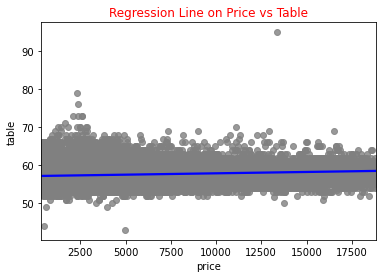

In [25]:
ax=sns.regplot(x="price", y="table", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Table", color="red");
# the outliers are unusually prominent (45<X<75)

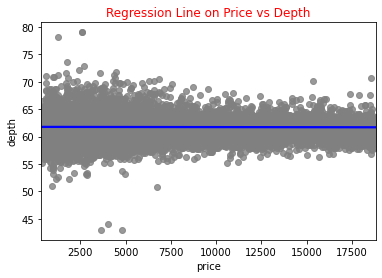

In [113]:
ax=sns.regplot(x="price", y="depth", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs Depth", color="red");
# the outliers are unusually prominent (45<X<75)

A few points to notice in these plots:

There are some features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. We call them "outliers".

- "x" has no dimensional outlies in our dataset.
- "y" and "z" have some dimensional outlies in our dataset that need to be eliminated.
- The "depth" should be capped but we must examine the regression line to be sure.
- The "table", "carat" features should be capped too.

# Outliers

In [152]:
# Due to the conclusions from the graphs, we will drop the outliers
diamonds = diamonds[(diamonds["y"]<30)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]
# diamonds = diamonds[(diamonds["carat"]<4.2)] it made my model worse
diamonds = diamonds[(diamonds["table"]<75)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>50)]

diamonds.shape

(53905, 10)

Reminder: We had 53,920 diamonds, now we have 53,905. It means that we "lost" only 15 diamonds.

Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

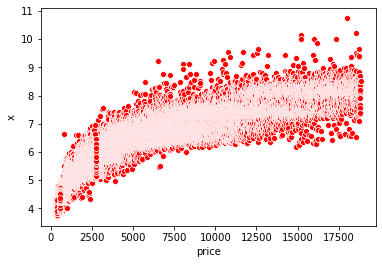

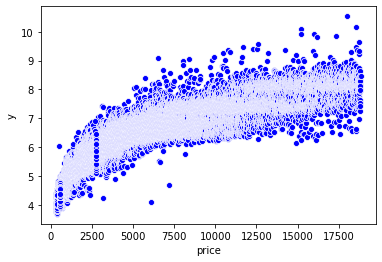

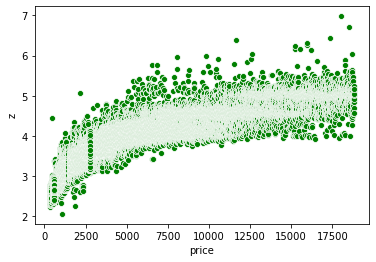

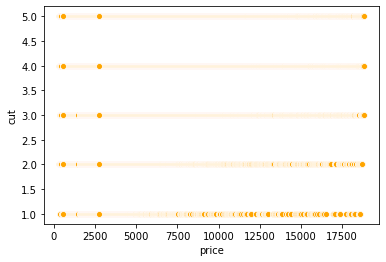

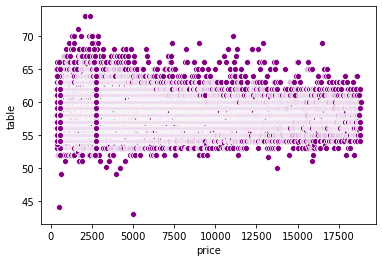

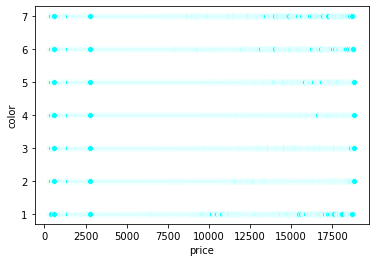

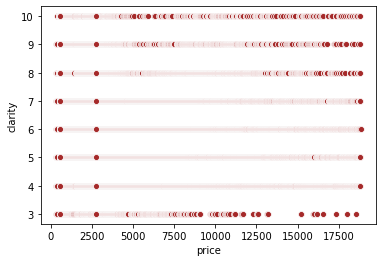

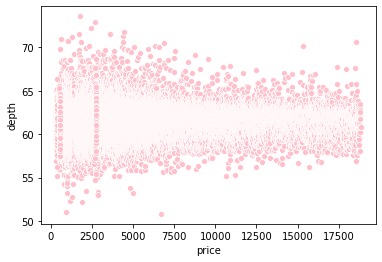

In [153]:
sns.scatterplot(x=diamonds.price, y=diamonds.x, color='red')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.y, color='blue')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.z, color='green')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.cut, color='orange')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.table, color='purple')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.color, color='cyan')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.clarity, color='brown')
plt.show()
sns.scatterplot(x=diamonds.price, y=diamonds.depth, color='pink')
plt.show()

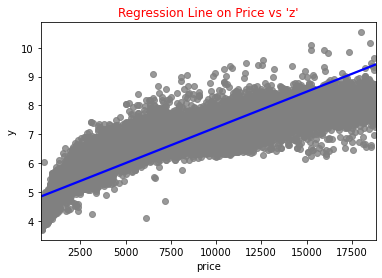

In [116]:
ax = sns.regplot(x="price", y="y", data=diamonds, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line on Price vs 'z'", color="red");

Some graphs to illustrate the symmetry of a diamond.

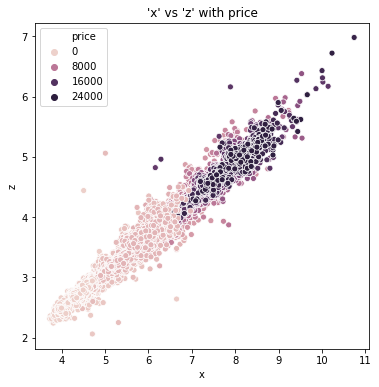

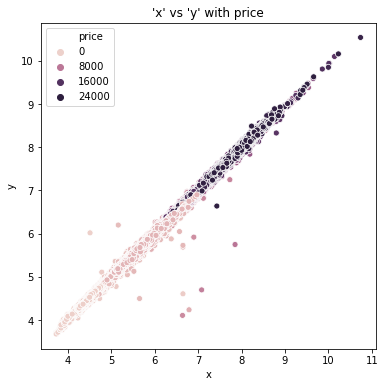

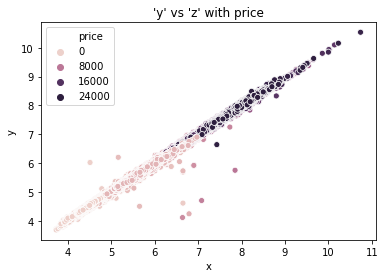

In [117]:
plt.figure(figsize=(6,6))
sns.scatterplot(diamonds.x, diamonds.z, hue=diamonds.price)
plt.title("'x' vs 'z' with price")
plt.show()
plt.figure(figsize=(6,6))
sns.scatterplot(diamonds.x, diamonds.y, hue=diamonds.price)
plt.title("'x' vs 'y' with price")
plt.show()
sns.scatterplot(diamonds.x, diamonds.y, hue=diamonds.price)
plt.title("'y' vs 'z' with price")
plt.show()

More graphs to illustrate the direct connection between 'x','y','z' and the carat.

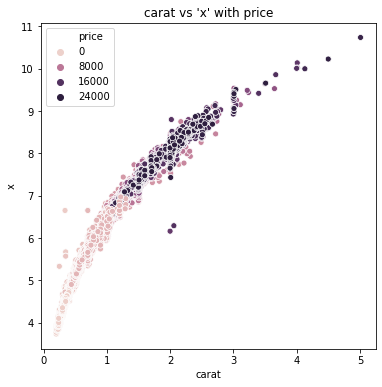

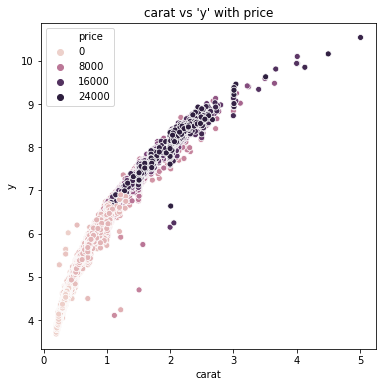

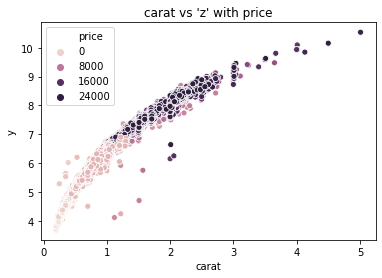

In [154]:
plt.figure(figsize=(6,6))
sns.scatterplot(diamonds.carat, diamonds.x, hue=diamonds.price)
plt.title("carat vs 'x' with price")
plt.show()
plt.figure(figsize=(6,6))
sns.scatterplot(diamonds.carat, diamonds.y, hue=diamonds.price)
plt.title("carat vs 'y' with price")
plt.show()
sns.scatterplot(diamonds.carat, diamonds.y, hue=diamonds.price)
plt.title("carat vs 'z' with price")
plt.show()

You can see that the grapghs look much more better now, no outliers in our data.

In [156]:
diamonds.describe()

carat           cut         color       clarity         depth  \
count  53905.000000  53905.000000  53905.000000  53905.000000  53905.000000   
mean       0.797628      3.904573      4.405973      6.051684     61.749545   
std        0.473774      1.116117      1.701315      1.647087      1.419739   
min        0.200000      1.000000      1.000000      3.000000     50.800000   
25%        0.400000      3.000000      3.000000      5.000000     61.000000   
50%        0.700000      4.000000      4.000000      6.000000     61.800000   
75%        1.040000      5.000000      6.000000      7.000000     62.500000   
max        5.010000      5.000000      7.000000     10.000000     73.600000   

              table         price             x             y             z  
count  53905.000000  53905.000000  53905.000000  53905.000000  53905.000000  
mean      57.455205   3930.643799      5.731476      5.733313      3.539443  
std        2.222825   3987.264881      1.119402      1.111267      0.691446  
min       43.000000    326.000000      3.730000      3.680000      2.060000  
25%       56.000000    949.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5322.000000      6.540000      6.540000      4.040000  
max       73.000000  18823.000000     10.740000     10.540000      6.980000

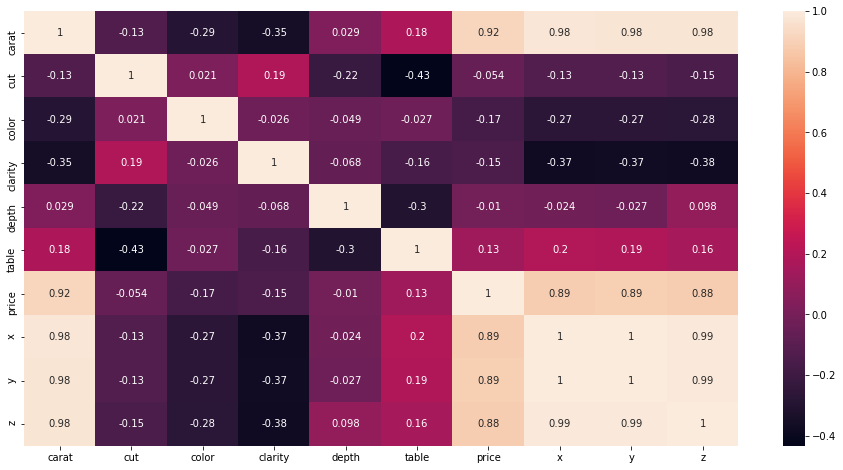

In [157]:
# the updated heatmap:

plt.figure(figsize=(16, 8))
sns.heatmap(diamonds.corr(), annot=True);

**Evolution:** As you can see, our work paid off. The correlation between the price to "carat", and x,y,z is stronger now:

- **carat -** bofore: 0.92. after: 0.92.
- **'x' -** bofore: 0.89. after: 0.89.
- **'y' -** bofore: 0.87. after: 0.89.
- **'z' -** bofore: 0.87. after: 0.88.

# SCALING

In [158]:
features = ['carat','cut','color','clarity', 'depth', 'table', 'x','y','z']
ss = StandardScaler()
df = diamonds
df[features] = ss.fit_transform(df[features])
df.head(3)

carat       cut     color   clarity     depth     table  price  \
0 -1.198110  0.981472  0.936947 -1.245655 -0.175770 -1.104553    326   
1 -1.240325  0.085500  0.936947 -0.638517 -1.373184  1.594740    326   
2 -1.198110 -1.706444  0.936947  0.575759 -3.415833  3.394269    327   

          x         y         z  
0 -1.591467 -1.577774 -1.604541  
1 -1.645068 -1.703757 -1.778092  
2 -1.502133 -1.496785 -1.778092

## Model Building

In [159]:
# Assigning the featurs as X and trarget as y
y= df["price"]
X= df.drop(["price"],axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [160]:
# equivalent command to do this in one line
#X = df[['carat', 'x', 'y', 'z']]

# print the first 5 rows
X.head()

carat       cut     color   clarity     depth     table         x  \
0 -1.198110  0.981472  0.936947 -1.245655 -0.175770 -1.104553 -1.591467   
1 -1.240325  0.085500  0.936947 -0.638517 -1.373184  1.594740 -1.645068   
2 -1.198110 -1.706444  0.936947  0.575759 -3.415833  3.394269 -1.502133   
3 -1.071466  0.085500 -1.414198 -0.031379  0.458156  0.245094 -1.368132   
4 -1.029251 -1.706444 -2.001984 -1.245655  1.092081  0.245094 -1.243064   

          y         z  
0 -1.577774 -1.604541  
1 -1.703757 -1.778092  
2 -1.496785 -1.778092  
3 -1.352804 -1.315290  
4 -1.244818 -1.141739

In [161]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(53905, 9)


In [162]:
# select a Series from the DataFrame
y = df['price']

# equivalent command that works if there are no spaces in the column name
y = df.price

# print the first 5 values
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [163]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(53905,)


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [165]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40428, 9)
(40428,)
(13477, 9)
(13477,)


# $R^2$ Score

We will use $R^2$ Score as our accurucy metric. The formula of $R^2$ is:

$$R^2 = \frac{Var(mean)-Var(line)}{Var(mean)}$$ $*(Var = Variation)$

$Var(mean)$ : The sum of the squared differences from the mean line of our data. The black line in the above graph represents the mean line.

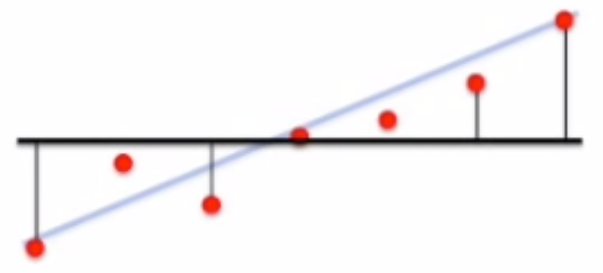

$Var(line)$ : The sum of the squared differences from our model line. The blue line in the above graph represents the model line.

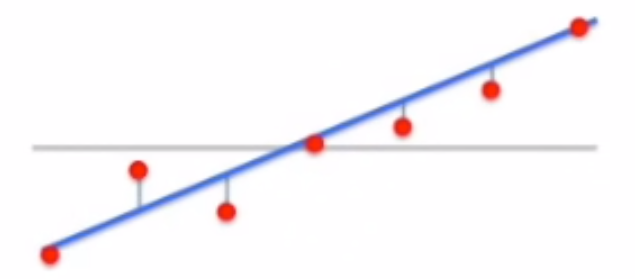

# Dummy Regressor

### By mean:

In [166]:
dummy_regr_mean = DummyRegressor(strategy="mean")
dummy_regr_mean.fit(X_train, y_train)
y_pred = dummy_regr_mean.predict(X_test)
err_dummy_mean = mean_squared_error(y_test,dummy_regr_mean.predict(X_test), squared=False)
initial_prediction_dm_mean = dummy_regr_mean.predict(X_test)

print("R2 Score:",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print ("Mean Square ERR:",mean_squared_error(y_test,dummy_regr_mean.predict(X_test), squared=False))

R2 Score: -0.00018276293904184726
Mean Absolute Error: 3040.971037435245
Mean Square ERR: 4015.2346938510827


In [167]:
results = {}
results["Predicted"] = initial_prediction_dm_mean.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576    3917.07     5038
45206    3917.07     1656
52940    3917.07     2592
212      3917.07     2780
983      3917.07     2896
...          ...      ...
38601    3917.07     1038
43573    3917.07     1431
28011    3917.07      658
39176    3917.07     1063
45059    3917.07     1641

[13477 rows x 2 columns]

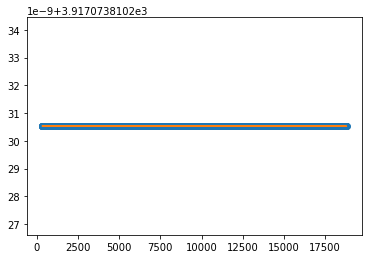

In [168]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b);

### By median:

In [169]:
dummy_regr_median = DummyRegressor(strategy="median")
dummy_regr_median.fit(X_train, y_train)
y_pred = dummy_regr_median.predict(X_test)
err_dummy_meadian = mean_squared_error(y_test,dummy_regr_median.predict(X_test), squared=False)
initial_prediction_dm_median = dummy_regr_median.predict(X_test)

print("R2 Score:",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ("Mean Square ERR:",mean_squared_error(y_test,dummy_regr_median.predict(X_test), squared=False))

R2 Score: -0.15464634081970963
Mean Absolute Error: 2832.0720115752765
Mean Square ERR: 4314.154997009771


In [170]:
results = {}
results["Predicted"] = initial_prediction_dm_median.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576     2392.5     5038
45206     2392.5     1656
52940     2392.5     2592
212       2392.5     2780
983       2392.5     2896
...          ...      ...
38601     2392.5     1038
43573     2392.5     1431
28011     2392.5      658
39176     2392.5     1063
45059     2392.5     1641

[13477 rows x 2 columns]

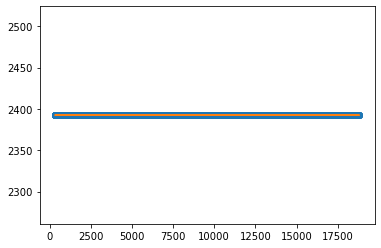

In [171]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b);

# KNN Regressor

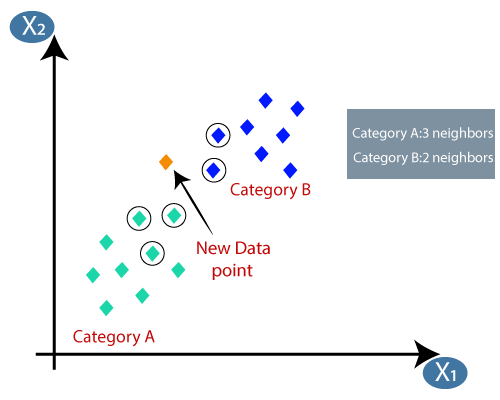

#### The output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [172]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
initial_prediction_knn = knn.predict(X_test)
y_pred = knn.predict(X_test)

print("R2 Score:",metrics.r2_score(y_test, y_pred))
print ("Mean Square ERR:",mean_squared_error(y_test,initial_prediction_knn, squared=False))

R2 Score: 0.9667747941084417
Mean Square ERR: 731.821379460712


We will find the best number of neighbors (k) for better results:

In [173]:
for k in range(3,21):  
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    initial_prediction_knn = knn.predict(X_test)
    y_pred = knn.predict(X_test)
    print ("Mean Square ERR for k =",k,":",mean_squared_error(y_test,initial_prediction_knn, squared=False))

Mean Square ERR for k = 3 : 752.9018135130947
Mean Square ERR for k = 4 : 744.1421162711234
Mean Square ERR for k = 5 : 731.821379460712
Mean Square ERR for k = 6 : 728.4907291958497
Mean Square ERR for k = 7 : 724.304783115225
Mean Square ERR for k = 8 : 721.8532625011277
Mean Square ERR for k = 9 : 718.5307638458639
Mean Square ERR for k = 10 : 718.0993954620792
Mean Square ERR for k = 11 : 720.6390715377154
Mean Square ERR for k = 12 : 722.1215573807572
Mean Square ERR for k = 13 : 721.7556287661863
Mean Square ERR for k = 14 : 721.6082166105763
Mean Square ERR for k = 15 : 723.8698576829694
Mean Square ERR for k = 16 : 725.0714642540732
Mean Square ERR for k = 17 : 724.6761245048068
Mean Square ERR for k = 18 : 727.0417567425695
Mean Square ERR for k = 19 : 727.9167971892035
Mean Square ERR for k = 20 : 727.8263920920107


K = 10 gave us the best results

In [174]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
initial_prediction_knn = knn.predict(X_test)
y_pred = knn.predict(X_test)

print("R2 Score:",metrics.r2_score(y_test, y_pred))
print ("Mean Square ERR:",mean_squared_error(y_test,initial_prediction_knn, squared=False))

R2 Score: 0.9680090882747661
Mean Square ERR: 718.0993954620792


### Cross validation:

In [175]:
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="r2")

#print(knn_reg_scores)
#print(knn_reg_scores_r2)

print("After cross validation:\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

After cross validation:

R2 Score: 0.968004012124006
Mean Square ERR: 711.4797801267415


In [176]:
results = {}
results["Predicted"] = initial_prediction_knn.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576     4895.6     5038
45206     1750.4     1656
52940     2394.0     2592
212       3040.1     2780
983       2562.0     2896
...          ...      ...
38601      967.7     1038
43573     1345.5     1431
28011      574.9      658
39176      968.0     1063
45059     1850.9     1641

[13477 rows x 2 columns]

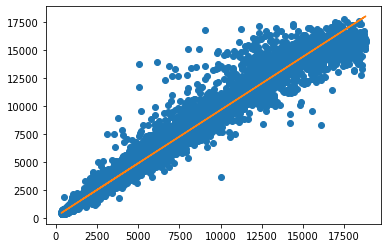

In [177]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b);

# Linear Regression

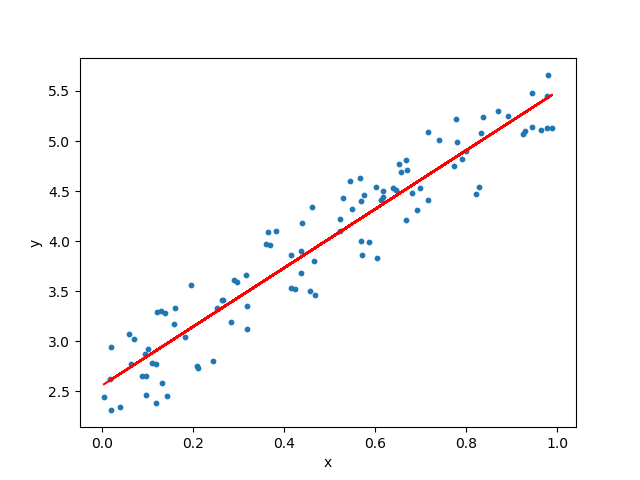

#### A linear approach to modelling the relationship between a scalar response and one or more explanatory variables.

In [178]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
initial_prediction_lr = linear_reg.predict(X_test)

print("R2 Score:",linear_reg.score(X_test,y_test))
print("Mean Square ERR:",mean_squared_error(y_test,initial_prediction_lr, squared=False))

R2 Score: 0.9124675104495008
Mean Square ERR: 1187.8343843808789


### Cross validation:

In [179]:
linear_reg_scores = cross_val_score(LinearRegression(),X_train, y_train,cv=5,scoring="neg_mean_squared_error", )
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=5,scoring="r2")

#print(linear_reg_scores)
#print(linear_reg_scores_r2)

print("After cross validation:\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-linear_reg_scores.mean()))

After cross validation:

R2 Score: 0.9065039842160416
Mean Square ERR: 1216.127025560655


In [180]:
results = {}
results["Predicted"] = initial_prediction_lr.round(2)
results["Reality"] = y_test

pd.DataFrame.from_dict(results)

Predicted  Reality
11576    5539.47     5038
45206    1796.11     1656
52940    2793.63     2592
212      3431.15     2780
983      3605.13     2896
...          ...      ...
38601    1190.56     1038
43573    2631.89     1431
28011     312.08      658
39176    1053.57     1063
45059    2252.98     1641

[13477 rows x 2 columns]

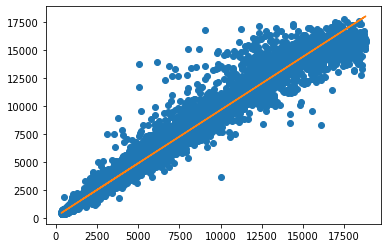

In [181]:
plt.plot(y_test, y_pred, 'o')
ln, b = np.polyfit(y_test, y_pred,1)
plt.plot(y_test,ln*y_test+b);

# Conclusion

In [183]:
print("The score for the models:\n")
print("Dummy Regressor:     ",round(err_dummy_mean,5),"  Mean Square ERR.")
print("KNN Regressor:       ",round(np.sqrt(-knn_reg_scores.mean()),5),"    Mean Square ERR.")
print("Linear Regression:   ",round(np.sqrt(-linear_reg_scores.mean()),5),"  Mean Square ERR.")

The score for the models:

Dummy Regressor:      4015.23469   Mean Square ERR.
KNN Regressor:        711.47978     Mean Square ERR.
Linear Regression:    1216.12703   Mean Square ERR.


## It can be concluded that KNN-Regressor is the most accurated model for our dataset, with 711.47978 Mean Square ERR.